# Machine Learning Engineer Nanodegree
## Deep Learning
## Project: Build a Digit Recognition Program

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

----
## Step 1: Design and Test a Model Architecture
Design and implement a deep learning model that learns to recognize sequences of digits. Train the model using synthetic data generated by concatenating character images from [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) or [MNIST](http://yann.lecun.com/exdb/mnist/). To produce a synthetic sequence of digits for testing, you can for example limit yourself to sequences up to five digits, and use five classifiers on top of your deep network. You would have to incorporate an additional ‘blank’ character to account for shorter number sequences.

There are various aspects to consider when thinking about this problem:
- Your model can be derived from a deep neural net or a convolutional network.
- You could experiment sharing or not the weights between the softmax classifiers.
- You can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

Here is an example of a [published baseline model on this problem](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf). ([video](https://www.youtube.com/watch?v=vGPI_JvLoN0))

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
import numpy as np
import keras
import idx2numpy
import os
import h5py

Using TensorFlow backend.


In [3]:
#import all the pieces of the neural network
from keras.models import Sequential, Model#the model
from keras.layers import Dense, Dropout, Activation, Flatten, Input #fully connected layers
from keras.layers import Convolution2D, MaxPooling2D #the convnet
from keras.utils import np_utils #extra tools

In [13]:
np.random.seed(123)  # for reproducibility

In [4]:
# read data and convert idx file to numpy array
ndarr = idx2numpy.convert_from_file('train-images.idx3-ubyte')
labels_raw = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
dataset_size = ndarr.shape[0]/5
image_height = 28
image_width = (28*5) # five images long


def createSequences():
    dataset = np.ndarray(shape=(dataset_size, image_height, image_width),
                         dtype=np.float32)

    data_labels = []

    i = 0
    w = 0
    while i < dataset_size:
        temp = np.hstack([ndarr[w], ndarr[w + 1], ndarr[w + 2], ndarr[w + 3], ndarr[w + 4]])
        dataset[i, :, :] = temp
        temp_str = (labels_raw[w], labels_raw[w + 1], labels_raw[w + 2], labels_raw[w + 3], labels_raw[w + 4])
        data_labels.append(temp_str)
        w += 5
        i += 1

    np.array(data_labels)

    return dataset, data_labels


dataset, data_labels = createSequences()

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [6]:
dataset=dataset[:,np.newaxis,:,:] 
#print a few things to make sure it looks good
print("size of one image:", dataset[0].shape)
print("dataset size:", dataset.shape)
print("length of labels array:", len(data_labels))
print("sample label:", data_labels[0])

size of one image: (1, 28, 140)
dataset size: (12000, 1, 28, 140)
length of labels array: 12000
sample label: (5, 0, 4, 1, 9)


In [7]:
#create train and test set from new dataset
from sklearn.cross_validation import train_test_split
y = data_labels
X = dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
#additional preprocessing
#1) the train and test must be numpy arrays
#2) each digit (the label) needs to be in a separate array to that it can be fed into the model
#3) these new arrays must be encoded

In [9]:
train_array= np.array(y_train)
test_array= np.array(y_test)
#unlike the traditional MNIST tutorials, we need to predict the concatenated image of 5 different numbers
#so I'm using numpy to create arrays for each number
#I'll then have to encode these
#train labels 
digit0=(train_array[:,0])
digit1=(train_array[:,1])
digit2=(train_array[:,2])
digit3=(train_array[:,3])
digit4=(train_array[:,4])
#do test labels as well 
digit0t=(test_array[:,0])
digit1t=(test_array[:,1])
digit2t=(test_array[:,2])
digit3t=(test_array[:,3])
digit4t=(test_array[:,4])

In [10]:
#encode train labels
tr_0 = np_utils.to_categorical(digit0, 10) #10 possible digits to encode 0-9
tr_1 = np_utils.to_categorical(digit1, 10)
tr_2 = np_utils.to_categorical(digit2, 10)
tr_3 = np_utils.to_categorical(digit3, 10)
tr_4 = np_utils.to_categorical(digit4, 10) 
#encode test labels
te_0 = np_utils.to_categorical(digit0t, 10)
te_1 = np_utils.to_categorical(digit1t, 10)
te_2 = np_utils.to_categorical(digit2t, 10)
te_3 = np_utils.to_categorical(digit3t, 10)
te_4 = np_utils.to_categorical(digit4t, 10)

In [11]:
#check that everything worked
print('X_train shape:', X_train.shape)
print('y_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(tr_3.shape, 'encoded training labels for digit 3')

X_train shape: (9600, 1, 28, 140)
y_train shape: (9600, 1, 28, 140)
9600 train samples
2400 test samples
(9600, 10) encoded training labels for digit 3


In [12]:
#data must be reshaped for tensorflow backend input
#keras backend image dim order is tf
X_train = X_train.reshape(X_train.shape[0], 28, 140, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 140, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 #normalize our data values to the range [0, 1], 255 is the max value of X_train.max()
X_test /= 255

In [21]:
#THE MODEL#
batch_size = 128
nb_classes = 10
nb_epoch = 2

img_rows =28
img_cols=140
img_channels = 1

model_input=Input(shape=(img_rows, img_cols, img_channels))

x = Convolution2D(32, 3, 3, border_mode='same')(model_input)
x = Activation('relu')(x)
x = Convolution2D(32, 3, 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
conv_out = Flatten()(x)

x1 = Dense(nb_classes, activation='softmax')(conv_out)
x2 = Dense(nb_classes, activation='softmax')(conv_out)
x3 = Dense(nb_classes, activation='softmax')(conv_out)
x4 = Dense(nb_classes, activation='softmax')(conv_out)
x5 = Dense(nb_classes, activation='softmax')(conv_out)

lst = [x1, x2, x3, x4, x5]

model = Model(input=model_input, output=lst) #you can't use a sequential model for this type of prediction

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train, [tr_0, tr_1, tr_2, tr_3, tr_4], batch_size=batch_size, nb_epoch=nb_epoch,verbose=1)
#set verbose to 0 if you run many, many epochs and don't want a huge printout

Epoch 1/2
9600/9600 [==============================] - 202s - loss: 4.4870 - dense_36_loss: 0.8714 - dense_37_loss: 0.8822 - dense_38_loss: 0.8757 - dense_39_loss: 0.9028 - dense_40_loss: 0.9549 - dense_36_acc: 0.7186 - dense_37_acc: 0.7146 - dense_38_acc: 0.7194 - dense_39_acc: 0.6976 - dense_40_acc: 0.6908      

In [22]:
Y_pred = model.predict(X_test)
pred_array= np.array(Y_pred)#the output is a list but we need an array for the custom accuracy metric

In [23]:
#evaluate model using out of the box metric and custom accuracy metric
#The out of the box accuracy is calculating if the entire sequence is correct.

y_Test = [te_0, te_1, te_2, te_3, te_4]
score = model.evaluate(X_test, y_Test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.27219124794
Test accuracy: 0.277793091858


In [30]:
#take a look at what was predicted vs the actual labels
for n in range (0,10):
    print('predicted digits:', Y_pred[0][n].argmax(), Y_pred[1][n].argmax(), Y_pred[2][n].argmax(),\
          Y_pred[3][n].argmax(), Y_pred[4][n].argmax())
    print('actual digits:', y_test[n])
    print('---------------------------')

predicted digits: 2 7 8 3 2
actual digits: (2, 7, 8, 3, 2)
---------------------------
predicted digits: 0 8 2 5 9
actual digits: (0, 8, 2, 5, 9)
---------------------------
predicted digits: 1 0 9 6 6
actual digits: (1, 0, 9, 6, 6)
---------------------------
predicted digits: 9 3 9 4 2
actual digits: (9, 3, 9, 4, 2)
---------------------------
predicted digits: 2 4 1 7 2
actual digits: (2, 4, 8, 7, 2)
---------------------------
predicted digits: 3 6 0 7 2
actual digits: (3, 6, 0, 7, 2)
---------------------------
predicted digits: 1 1 7 4 8
actual digits: (1, 1, 7, 4, 8)
---------------------------
predicted digits: 3 4 4 9 6
actual digits: (3, 4, 7, 9, 6)
---------------------------
predicted digits: 5 2 7 8 0
actual digits: (5, 2, 7, 8, 0)
---------------------------
predicted digits: 2 1 3 1 6
actual digits: (2, 1, 5, 1, 6)
---------------------------


### Question 1
_What approach did you take in coming up with a solution to this problem?_

**Answer:**
First, I read the forum to figure out the best way to concatenate the MNIST images, and it looked like the package idx2numpy was the best idea.

Somebody created a Python package which provides tools to convert IDX format (used at http://yann.lecun.com/exdb/mnist/) into numpy.ndarray. Check it out here https://pypi.python.org/pypi/idx2numpy.

After converting the idx to a numpy array numpy.hstack method was used to generate sequences. This approach is super fast requiring just a few seconds.

Second, I was just figuring out to input the data to the neural net for few days. I realized to have the model output 5 different predictions. I needed the data_labels to be a list of numpy arrays of length 5. Each of the numpy arrays then had to be encoded to have 10 different classes (ex. the number 3 would not be '3' but '0010000000'.

Third, I found out that a sequential model in Keras would not work either, but one can just do from keras.models import Model. The Sequential model is a linear stack of layers. Whreas, the Keras Model (functional API) is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers. Which is why Model was used in our case as it is a multi-output model.

Refrences:

1) https://discussions.udacity.com/t/step-1-concatenation-of-mnist/207676

2) https://elitedatascience.com/keras-tutorial-deep-learning-in-python

3) https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

4) https://keras.io/getting-started/functional-api-guide/

### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_

**Answer:**

This model has the architecture [INPUT - CONV - RELU - CONV - RELU - POOL - FC]

INPUT [28x140x1] will hold the raw pixel values of the image

CONV layer - slides a filter (kernel) over the image and computes a dot product between their weights and the target pattern (a small region they are connected to in the input volume). This may result in volume such as [28x140x32] if we decided to use 32 filters.

RELU layer - replaces all negative pixel values in the feature map with zero. This is a non-linear function and is helpful because real world data is usually not linear. This layer leaves the size of the volume unchanged([28x140x32]).

POOL layer - will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as [14x70x32].

The cycles of conv and relu make the neural net wider. Multiple stacked CONV layers can develop more complex features before the pooling reduces the data.

FC (i.e. fully-connected) layer will compute the class scores, resulting in volume of size [1x1x10], where each of the 10 numbers correspond to a class score, such as among the 10 categories of MNIST (numbers 0-9).

### Question 3
_How did you train your model? How did you generate your synthetic dataset?_ Include examples of images from the synthetic data you constructed.

**Answer:**

I used a package idx2numpy to concatenate the images. Somebody created a Python package which provides tools to convert IDX format (used at http://yann.lecun.com/exdb/mnist/) into numpy.ndarray. Check it out here https://pypi.python.org/pypi/idx2numpy.

After converting the idx to a numpy array numpy.hstack method was used to generate sequences.

The model was trained and evaluated using the test set. I used a function in sklearn to split the data into train and test.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

9600 train samples and 2400 test samples were generated by train_test_split() from a dataset of 12000 samples. Details of training have been explained in Question 2.

Test accuracy comes out to be 27.78%

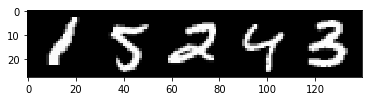

Label : (1, 5, 2, 4, 3)


In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
def displaySequence(n):
    fig=plt.figure()
    plt.imshow(dataset[n], cmap='gray')
    plt.show()
    print ('Label : {}'.format(data_labels[n]))
    
#display random sample to check if data is ok after creating sequences
displaySequence(random.randint(0, dataset_size))

----
## Step 2: Train a Model on a Realistic Dataset
Once you have settled on a good architecture, you can train your model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
# Import Modules
from six.moves import range
from six.moves.urllib.request import urlretrieve
from scipy import ndimage
from PIL import Image
import os
import sys
import tarfile

# Download data
print('Downloading data...')

url = 'http://ufldl.stanford.edu/housenumbers/'

def maybe_download(filename, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, filename)
    print('Download Complete!')
  statinfo = os.stat(filename)
  return filename

train_filename = maybe_download('train.tar.gz')
test_filename = maybe_download('test.tar.gz')

print('Successfully downloaded data!')

Successfully downloaded data!


In [3]:
import numpy as np
# Unzip Data
print('Unzipping data...')
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = root
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

print('Successfully unzipped data!')


Unzipping data...
train already present - Skipping extraction of train.tar.gz.
train
test already present - Skipping extraction of test.tar.gz.
test
Successfully unzipped data!


In [4]:
print('Creating dictionary of bounding boxes...')
# The DigitStructFile is just a wrapper around the h5py data.  It basically references 
#    inf:              The input h5 matlab file
#    digitStructName   The h5 ref to all the file names
#    digitStructBbox   The h5 ref to all struc data
class DigitStructFile:
    def __init__(self, inf):
        self.inf = h5py.File(inf, 'r')
        self.digitStructName = self.inf['digitStruct']['name']
        self.digitStructBbox = self.inf['digitStruct']['bbox']

# getName returns the 'name' string for for the n(th) digitStruct. 
    def getName(self,n):
        return ''.join([chr(c[0]) for c in self.inf[self.digitStructName[n][0]].value])

# bboxHelper handles the coding difference when there is exactly one bbox or an array of bbox. 
    def bboxHelper(self,attr):
        if (len(attr) > 1):
            attr = [self.inf[attr.value[j].item()].value[0][0] for j in range(len(attr))]
        else:
            attr = [attr.value[0][0]]
        return attr

# getBbox returns a dict of data for the n(th) bbox. 
    def getBbox(self,n):
        bbox = {}
        bb = self.digitStructBbox[n].item()
        bbox['height'] = self.bboxHelper(self.inf[bb]["height"])
        bbox['label'] = self.bboxHelper(self.inf[bb]["label"])
        bbox['left'] = self.bboxHelper(self.inf[bb]["left"])
        bbox['top'] = self.bboxHelper(self.inf[bb]["top"])
        bbox['width'] = self.bboxHelper(self.inf[bb]["width"])
        return bbox

    def getDigitStructure(self,n):
        s = self.getBbox(n)
        s['name']=self.getName(n)
        return s

# getAllDigitStructure returns all the digitStruct from the input file.     
    def getAllDigitStructure(self):
        return [self.getDigitStructure(i) for i in range(len(self.digitStructName))]

# Return a restructured version of the dataset (one structure by boxed digit).
#
#   Return a list of such dicts :
#      'filename' : filename of the samples
#      'boxes' : list of such dicts (one by digit) :
#          'label' : 1 to 9 corresponding digits. 10 for digit '0' in image.
#          'left', 'top' : position of bounding box
#          'width', 'height' : dimension of bounding box
#
# Note: We may turn this to a generator, if memory issues arise.
    def getAllDigitStructure_ByDigit(self):
        pictDat = self.getAllDigitStructure()
        result = []
        structCnt = 1
        for i in range(len(pictDat)):
            item = { 'filename' : pictDat[i]["name"] }
            figures = []
            for j in range(len(pictDat[i]['height'])):
               figure = {}
               figure['height'] = pictDat[i]['height'][j]
               figure['label']  = pictDat[i]['label'][j]
               figure['left']   = pictDat[i]['left'][j]
               figure['top']    = pictDat[i]['top'][j]
               figure['width']  = pictDat[i]['width'][j]
               figures.append(figure)
            structCnt = structCnt + 1
            item['boxes'] = figures
            result.append(item)
        return result
    
print("Successfully created dictionary of bounding boxes!")

Creating dictionary of bounding boxes...
Successfully created dictionary of bounding boxes!


In [7]:
train_folders = 'train'
test_folders = 'test'

fin = os.path.join(train_folders, 'digitStruct.mat')
dsf = DigitStructFile(fin)
train_data = dsf.getAllDigitStructure_ByDigit()

In [20]:
print(len(train_data))

33402


In [8]:
fin = os.path.join(test_folders, 'digitStruct.mat')
dsf = DigitStructFile(fin)
test_data = dsf.getAllDigitStructure_ByDigit()

In [9]:
from PIL import Image
train_imsize = np.ndarray([len(train_data),2])
for i in np.arange(len(train_data)):
    filename = train_data[i]['filename']
    fullname = os.path.join(train_folders, filename)
    im = Image.open(fullname)
    train_imsize[i, :] = im.size[:]
    
print(np.amax(train_imsize[:,0]), np.amax(train_imsize[:,1]))
print(np.amin(train_imsize[:,0]), np.amin(train_imsize[:,1]))

876.0 501.0
25.0 12.0


In [10]:
test_imsize = np.ndarray([len(test_data),2])
for i in np.arange(len(test_data)):
    filename = test_data[i]['filename']
    fullname = os.path.join(test_folders, filename)
    im = Image.open(fullname)
    test_imsize[i, :] = im.size[:]

print(np.amax(test_imsize[:,0]), np.amax(test_imsize[:,1]))
print(np.amin(test_imsize[:,0]), np.amin(test_imsize[:,1]))

1083.0 516.0
31.0 13.0


In [11]:
def generate_dataset(data, folder):

    dataset = np.ndarray([len(data),32,32,1], dtype='float32')
    labels = np.ones([len(data),6], dtype=int) * 10
    for i in np.arange(len(data)):
        filename = data[i]['filename']
        fullname = os.path.join(folder, filename)
        im = Image.open(fullname)
        boxes = data[i]['boxes']
        num_digit = len(boxes)
        labels[i,0] = num_digit
        top = np.ndarray([num_digit], dtype='float32')
        left = np.ndarray([num_digit], dtype='float32')
        height = np.ndarray([num_digit], dtype='float32')
        width = np.ndarray([num_digit], dtype='float32')
        for j in np.arange(num_digit):
            if j < 5: 
                labels[i,j+1] = boxes[j]['label']
                if boxes[j]['label'] == 10: labels[i,j+1] = 0
            else: print('#',i,'image has more than 5 digits.')
            top[j] = boxes[j]['top']
            left[j] = boxes[j]['left']
            height[j] = boxes[j]['height']
            width[j] = boxes[j]['width']
        
        im_top = np.amin(top)
        im_left = np.amin(left)
        im_height = np.amax(top) + height[np.argmax(top)] - im_top
        im_width = np.amax(left) + width[np.argmax(left)] - im_left
        
        im_top = np.floor(im_top - 0.1 * im_height)
        im_left = np.floor(im_left - 0.1 * im_width)
        im_bottom = np.amin([np.ceil(im_top + 1.2 * im_height), im.size[1]])
        im_right = np.amin([np.ceil(im_left + 1.2 * im_width), im.size[0]])

        im = im.crop((im_left, im_top, im_right, im_bottom)).resize([32,32], Image.ANTIALIAS)
        im = np.dot(np.array(im, dtype='float32'), [[0.2989],[0.5870],[0.1140]])
        mean = np.mean(im, dtype='float32')
        std = np.std(im, dtype='float32', ddof=1)
        if std < 1e-4: std = 1.
        im = (im - mean) / std
        dataset[i,:,:,:] = im[:,:,:]

    return dataset, labels

train_dataset, train_labels = generate_dataset(train_data, train_folders)
print(train_dataset.shape, train_labels.shape)

test_dataset, test_labels = generate_dataset(test_data, test_folders)
print(test_dataset.shape, test_labels.shape)

# 29929 image has more than 5 digits.
(33402, 32, 32, 1) (33402, 6)
(13068, 32, 32, 1) (13068, 6)


In [12]:
#delete if more than 5 digits
train_dataset = np.delete(train_dataset, 29929, axis=0)
train_labels = np.delete(train_labels, 29929, axis=0)
print(train_dataset.shape, train_labels.shape)

(33401, 32, 32, 1) (33401, 6)


In [13]:
# Build Validation Dataset and Labels Based on the Methods in This Paper:
# [https://arxiv.org/pdf/1204.3968.pdf]

import random

random.seed(123)

n_labels = 10
valid_index = []
train_index = []
for i in np.arange(n_labels):
    valid_index.extend(np.where(train_labels[:,1] == (i))[0][:400].tolist())
    train_index.extend(np.where(train_labels[:,1] == (i))[0][400:].tolist())

random.shuffle(valid_index)
random.shuffle(train_index)

valid_dataset = train_dataset[valid_index,:,:,:]
valid_labels = train_labels[valid_index,:]
train_dataset_t = train_dataset[train_index,:,:,:]
train_labels_t = train_labels[train_index,:]

print(train_dataset_t.shape, train_labels_t.shape)
print(test_dataset.shape, test_labels.shape)
print(valid_dataset.shape, valid_labels.shape)

(29717, 32, 32, 1) (29717, 6)
(13068, 32, 32, 1) (13068, 6)
(3684, 32, 32, 1) (3684, 6)


In [15]:
from six.moves import cPickle as pickle
pickle_file = 'SVHN_multi.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset_t,
    'train_labels': train_labels_t,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 191452812


In [16]:
pickle_file = 'SVHN_multi.pickle' #using a copy but otherwise the file is just SVHN_multi.pickle

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (29717, 32, 32, 1) (29717, 6)
Validation set (3684, 32, 32, 1) (3684, 6)
Test set (13068, 32, 32, 1) (13068, 6)


In [5]:
#for the model, the arrays must be created and encoded as before
digit02=(train_labels[:,0])
digit12=(train_labels[:,1])
digit22=(train_labels[:,2])
digit32=(train_labels[:,3])
digit42=(train_labels[:,4])
digit52=(train_labels[:,5]) 

digit0t2=(test_labels[:,0])
digit1t2=(test_labels[:,1])
digit2t2=(test_labels[:,2])
digit3t2=(test_labels[:,3])
digit4t2=(test_labels[:,4])
digit5t2=(test_labels[:,5])

In [6]:
from keras.utils import np_utils #extra tools
#encoding
tr_02 = np_utils.to_categorical(digit02, 11)#11 classes, not 10 like before
tr_12 = np_utils.to_categorical(digit12, 11)
tr_22 = np_utils.to_categorical(digit22, 11)
tr_32 = np_utils.to_categorical(digit32, 11)
tr_42 = np_utils.to_categorical(digit42, 11) 
tr_52 = np_utils.to_categorical(digit52, 11) 

te_02 = np_utils.to_categorical(digit0t2, 11)
te_12 = np_utils.to_categorical(digit1t2, 11)
te_22 = np_utils.to_categorical(digit2t2, 11)
te_32 = np_utils.to_categorical(digit3t2, 11)
te_42 = np_utils.to_categorical(digit4t2, 11) 
te_52 = np_utils.to_categorical(digit5t2, 11)

In [8]:
batch_size2 = 128
nb_classes2 = 11 #change number of classes
nb_epoch2 = 2

img_rows2 =32 #change input size
img_cols2=32
img_channels2 = 1 #data is grayscale, preprocessed this way

model_input2=Input(shape=(img_rows2, img_cols2, img_channels2))

x2 = Convolution2D(32, 3, 3, border_mode='same')(model_input2)
x2 = Activation('relu')(x2)
x2 = Convolution2D(32, 3, 3)(x2)
x2 = Activation('relu')(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)
conv_out2 = Flatten()(x2)

x12 = Dense(nb_classes2, activation='softmax')(conv_out2)
x22 = Dense(nb_classes2, activation='softmax')(conv_out2)
x32 = Dense(nb_classes2, activation='softmax')(conv_out2)
x42 = Dense(nb_classes2, activation='softmax')(conv_out2)
x52 = Dense(nb_classes2, activation='softmax')(conv_out2)
x62 = Dense(nb_classes2, activation='softmax')(conv_out2)

lst2 = [x12, x22, x32, x42, x52, x62]

model2 = Model(input=model_input2, output=lst2)

model2.compile(loss='categorical_crossentropy',optimizer='Adam', #switch btwn sgd and adam
metrics=['accuracy'])

model2.fit(train_dataset,[tr_02, tr_12, tr_22, tr_32, tr_42, tr_52], batch_size=batch_size2, nb_epoch=nb_epoch2, verbose=1)

Epoch 1/2
29717/29717 [==============================] - 164s - loss: 4.7765 - dense_1_loss: 0.5298 - dense_2_loss: 1.3029 - dense_3_loss: 1.6986 - dense_4_loss: 0.9667 - dense_5_loss: 0.2581 - dense_6_loss: 0.0204 - dense_1_acc: 0.7957 - dense_2_acc: 0.5691 - dense_3_acc: 0.4412 - dense_4_acc: 0.7365 - dense_5_acc: 0.9513 - dense_6_acc: 0.9955      

In [9]:
ypred_svhn = model2.predict(test_dataset)
pred_array_svhn= np.array(ypred_svhn)#create array for the custom accuracy calculation

In [14]:
for n in range (0,10):
    print('predicted digits:', ypred_svhn[0][n].argmax(), ypred_svhn[1][n].argmax(),
          ypred_svhn[2][n].argmax(), ypred_svhn[3][n].argmax(), ypred_svhn[4][n].argmax(), ypred_svhn[5][n].argmax())
    print('actual digits:', test_labels[n])
    print('---------------------------')

predicted digits: 1 5 10 10 10 10
actual digits: [ 1  5 10 10 10 10]
---------------------------
predicted digits: 2 2 0 0 10 10
actual digits: [ 3  2  1  0 10 10]
---------------------------
predicted digits: 2 6 5 10 10 10
actual digits: [ 1  6 10 10 10 10]
---------------------------
predicted digits: 1 1 10 10 10 10
actual digits: [ 1  1 10 10 10 10]
---------------------------
predicted digits: 1 6 10 10 10 10
actual digits: [ 1  9 10 10 10 10]
---------------------------
predicted digits: 1 1 10 10 10 10
actual digits: [ 1  1 10 10 10 10]
---------------------------
predicted digits: 3 1 8 3 10 10
actual digits: [ 3  1  8  3 10 10]
---------------------------
predicted digits: 2 6 1 10 10 10
actual digits: [ 2  6  5 10 10 10]
---------------------------
predicted digits: 3 1 4 4 10 10
actual digits: [ 3  1  4  4 10 10]
---------------------------
predicted digits: 2 1 6 10 10 10
actual digits: [ 2  1  6 10 10 10]
---------------------------


In [15]:
y_Test2 = [te_02, te_12, te_22, te_32, te_42, te_52]
score = model2.evaluate(test_dataset, y_Test2, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.27148466612


### Question 4
_Describe how you set up the training and testing data for your model. How does the model perform on a realistic dataset?_

**Answer:**
Model input changed slightly to fit the new dataset becaues the image dimensions are 32x32 and not 28x140 pixels. Another dense layer was added for the extra class (the shape of the labels was 6 not 5). The number of classes increased to 11 (the possibility that there is not a number because all of the dataset does not have exactly five digits as before, this null is represented as 10, so we have numbers 0-10 or 11 classes).

Validation dataset and labels were buit based on the methods in this paper: https://arxiv.org/pdf/1204.3968.pdf giving rise to following dataset:

Training set (29717, 32, 32, 1) (29717, 6)
Validation set (3684, 32, 32, 1) (3684, 6)
Test set (13068, 32, 32, 1) (13068, 6)

Test accuracy for the realisticS VHN dataset came out to be 27.15% whereas Test accuracy for MNIST dataset was 27.78%

Therefore, may be the complexity of the images in SVHN cause it to perform worse.

### Question 5
_What changes did you have to make, if any, to achieve "good" results? Were there any options you explored that made the results worse?_

**Answer:**
Most of the work done was preprocessing the data - getting the bounding boxes, cropping the images, changing to grayscale, getting the arrays in the correct shape for the model.

Source: https://github.com/hangyao/street_view_house_numbers

I tried changing the learning rate but saw no huge improvement over the defaults within the Adam optimizer keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

I noticed that when I ran the model for 10 epochs, the accuracy was lower. This is likely overfitting.

### Question 6
_What were your initial and final results with testing on a realistic dataset? Do you believe your model is doing a good enough job at classifying numbers correctly?_

**Answer:**
My initial try with SVHN had a test accuracy of less than 15%.

No, I don't believe it does a good enough job at classifying the numbers. It is not great at classifying the entire sequence. I read many forums and stack overflow posts and it seems classifying the sequence eludes many. A very simple tutorial can have you classifying single digit MNIST with over 95% accuracy, but a sequence of numbers must pose challenges that are outside the scope of what I currently know.

Goodfellow et al., produced a whole-sequence transcription accuracy of ~96% on the public SVHN dataset [https://arxiv.org/pdf/1312.6082v4.pdf]. Definitely amazed and in awe of their research!

----
## Step 3: Test a Model on Newly-Captured Images

Take several pictures of numbers that you find around you (at least five), and run them through your classifier on your computer to produce example results. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [61]:
def rgb2gray(rgb): #svhn images were set to grayscale before training model, so doing the same here
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [62]:
import glob
import matplotlib.image as img

new_images=[]

for image_path in glob.glob("new images/*.jpg"):
    image = img.imread(image_path)
    image = rgb2gray(image)
    new_images.append(image)

In [63]:
import matplotlib.pyplot as plt
def displaySequence2(n):
    fig=plt.figure()
    plt.imshow(new_images[n], cmap='gray')
    plt.show()

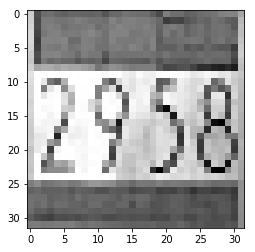

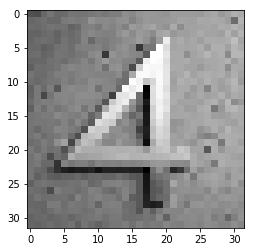

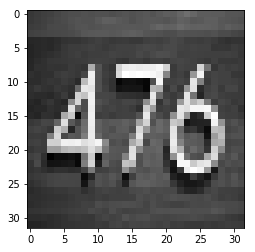

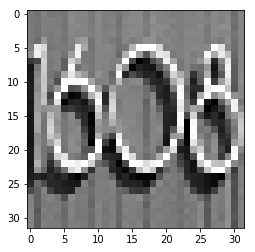

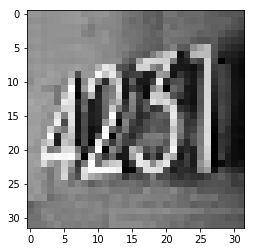

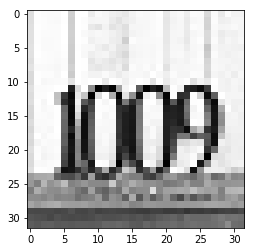

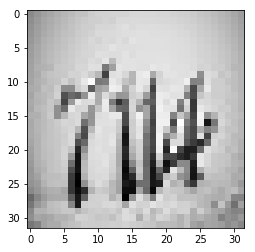

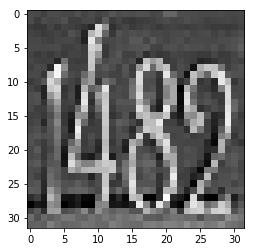

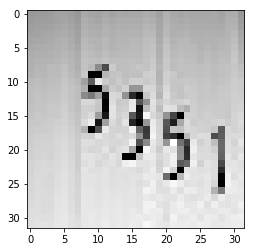

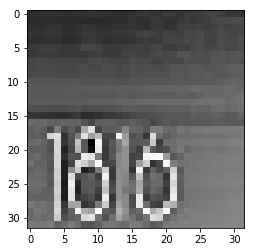

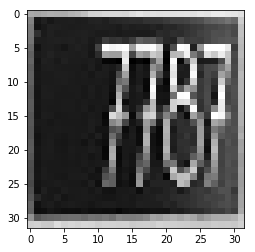

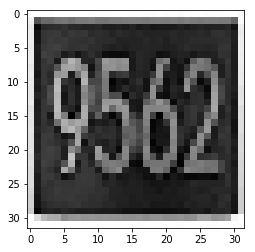

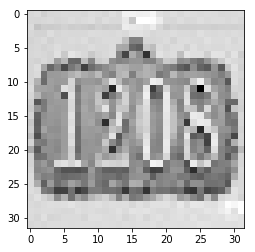

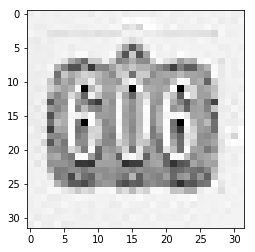

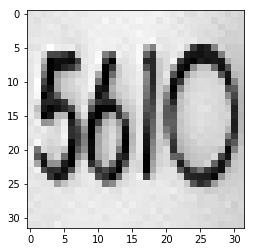

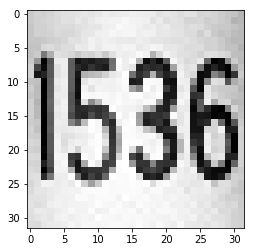

In [60]:
for i in range(len(new_images)):
    displaySequence2(i)

In [61]:
new_images[2].shape

(32, 32)

In [64]:
reshaped=[]
for image in new_images:
    image = image.reshape(image.shape[1],32, 1)#had 2 in there image.shape[2],32,32, 1
    image.astype(float)
    reshaped.append(image)

In [65]:
reshaped=np.array(reshaped)
reshaped2= reshaped.reshape(reshaped.shape[0], 32, 32, 1)
reshaped2.shape

(16, 32, 32, 1)

In [64]:
preds_real = model2.predict(reshaped2)

In [65]:
array_preds_real=np.array(preds_real)

In [75]:
labels_array = np.array([[2,9,5,8,10,10],[4,10,10,10,10,10],[4,7,6,10,10,10],[1,6,0,8,10,10],
                         [4,2,3,1,10,10],[1,0,0,9,10,10],[7,1,1,4,10,10],[1,4,8,2,10,10],
                         [5,3,5,1,10,10],[1,8,1,6,10,10],[7,7,8,7,10,10],[9,5,6,2,10,10],
                         [1,2,0,8,10,10],[6,0,6,10,10,10],[5,6,1,0,10,10],[1,5,3,6,10,10]])

### Question 7
_Choose five candidate images of numbers you took from around you and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?_

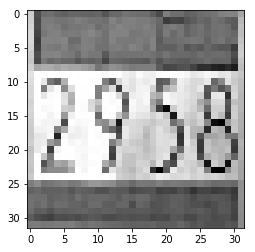

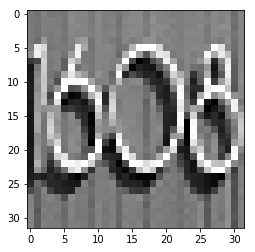

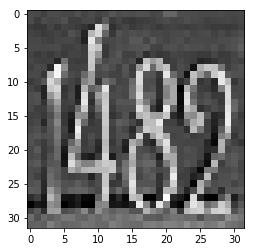

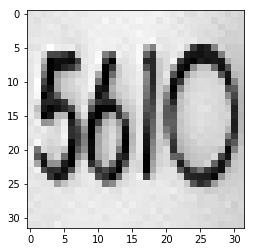

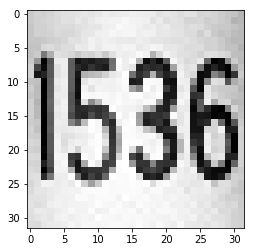

In [72]:
displaySequence2(0)
displaySequence2(3)
displaySequence2(7)
displaySequence2(14)
displaySequence2(15)

**Answer:**
Image 1 - the background could make it harder to predict

Image 2 - the numbers in this image don't seem highly predictable due to the low resolution. Digit 8 seems to be 0.

Image 3 - the numbers in this image don't seem highly predictable due to the background and digit 1 can't be recognize

Image 4 - the numbers in this image seem highly predictable due to gray backgraound and clear digits

Image 5 - the numbers in this image seem highly predictable due to gray backgraound and clear digits

### Question 8
_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the realistic dataset?_

**Answer:** No, it is not. Performance of my model is much worse on captured pictures than on the realistic dataset. Have a look at the output of code cell below.

In [77]:
for n in range(len(new_images)):
    print('predicted digits:', preds_real[0][n].argmax(), preds_real[1][n].argmax(),
          preds_real[2][n].argmax(), preds_real[3][n].argmax(), preds_real[4][n].argmax(), preds_real[5][n].argmax())
    print('actual digits:', labels_array[n])
    print('---------------------------')

predicted digits: 2 1 10 10 10 10
actual digits: [ 2  9  5  8 10 10]
---------------------------
predicted digits: 1 4 10 10 10 10
actual digits: [ 4 10 10 10 10 10]
---------------------------
predicted digits: 3 4 7 6 10 10
actual digits: [ 4  7  6 10 10 10]
---------------------------
predicted digits: 3 2 4 8 10 10
actual digits: [ 1  6  0  8 10 10]
---------------------------
predicted digits: 3 4 9 10 10 10
actual digits: [ 4  2  3  1 10 10]
---------------------------
predicted digits: 3 1 6 2 10 10
actual digits: [ 1  0  0  9 10 10]
---------------------------
predicted digits: 3 1 6 10 10 10
actual digits: [ 7  1  1  4 10 10]
---------------------------
predicted digits: 4 1 9 9 10 10
actual digits: [ 1  4  8  2 10 10]
---------------------------
predicted digits: 2 4 6 10 10 10
actual digits: [ 5  3  5  1 10 10]
---------------------------
predicted digits: 2 1 4 10 10 10
actual digits: [ 1  8  1  6 10 10]
---------------------------
predicted digits: 3 7 8 8 10 10
actual dig

### Optional: Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._

**Answer:** Leave blank if you did not complete this part.

----
### Step 4: Explore an Improvement for a Model

There are many things you can do once you have the basic classifier in place. One example would be to also localize where the numbers are on the image. The SVHN dataset provides bounding boxes that you can tune to train a localizer. Train a regression loss to the coordinates of the bounding box, and then test it. 

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [72]:
#USING REGRESSION TO PREDICT BOUNDING BOXES PARAMETERS FOR AN IMAGE IN TRAIN DATASET
#We will predict parameters for one digit in an image at a time
def return_params_train(train_data,train_dataset,c,size):#returns parameters of cth position digit in an image
    train_dataset_2=np.zeros(shape=(size,32,32,1))
    left_label=[]
    top_label=[]
    width_label=[]
    height_label=[]
    y_train = []
    k = 0
    for r in range(size):
        j= len(train_data[r]['boxes']) # will give no of digits of ith image
        if c <= j-1:# the image does have cth digit
            train_dataset_2[k]=train_dataset[r]# removing that image from train_Dataset
            k+=1
            #calculating bounding boxes only for the digit at cth position in each image
            left_label.append(train_data[r]['boxes'][c]['left'])
            top_label.append(train_data[r]['boxes'][c]['top'])
            width_label.append(train_data[r]['boxes'][c]['width'])
            height_label.append(train_data[r]['boxes'][c]['height'])

    y_train.append(left_label)
    y_train.append(top_label)
    y_train.append(width_label)
    y_train.append(height_label)
    y_train = np.array(y_train)
    y_train = y_train.T
    p = y_train.shape[0]
    train_dataset_3=train_dataset_2[0:p,:,:,:]    # dataset will only extend till the number of labels
    return y_train,train_dataset_3

In [73]:
#USING REGRESSION TO PREDICT BOUNDING BOXES PARAMETERS FOR AN IMAGE IN TEST DATASET
#We will predict parameters for one digit in an image at a time
def return_params_test(test_data,test_dataset,c,size):#returns parameters of cth position digit in an image
    test_dataset_2=np.zeros(shape=(size,32,32,1))
    left_label=[]
    top_label=[]
    width_label=[]
    height_label=[]
    y_test = []
    k = 0
    for r in range(size):
        j = len(test_data[r]['boxes']) # will give no of digits of ith image
        if c <= j-1:# the image does have cth digit
            test_dataset_2[k]=test_dataset[r]# removing that image from test_Dataset
            k+=1
            #calculating bounding boxes only for the digit at cth position in each image
            left_label.append(test_data[r]['boxes'][c]['left'])
            top_label.append(test_data[r]['boxes'][c]['top'])
            width_label.append(test_data[r]['boxes'][c]['width'])
            height_label.append(test_data[r]['boxes'][c]['height'])

    y_test.append(left_label)
    y_test.append(top_label)
    y_test.append(width_label)
    y_test.append(height_label)
    y_test = np.array(y_test)
    y_test = y_test.T
    p = y_test.shape[0]
    test_dataset_3=test_dataset_2[0:p,:,:,:]    # dataset will only extend till the number of labels
    return y_test,test_dataset_3

In [74]:
#Courtesy: http://ronny.rest/tutorials/lesson/intersect_of_union/

def batch_iou(a, b, epsilon=1e-5):
    """ Given two arrays `a` and `b` where each row contains a bounding
        box defined as a list of four numbers:
            [x1,y1,x2,y2]
        where:
            x1,y1 represent the upper left corner
            x2,y2 represent the lower right corner
        It returns the Intersect of Union scores for each corresponding
        pair of boxes.

    Args:
        a:          (numpy array) each row containing [x1,y1,x2,y2] coordinates
        b:          (numpy array) each row containing [x1,y1,x2,y2] coordinates
        epsilon:    (float) Small value to prevent division by zero

    Returns:
        (numpy array) The Intersect of Union scores for each pair of bounding
        boxes.
    """
    # COORDINATES OF THE INTERSECTION BOXES
    x1 = np.array([a[:, 0], b[:, 0]]).max(axis=0)
    y1 = np.array([a[:, 1], b[:, 1]]).max(axis=0)
    x2 = np.array([a[:, 2], b[:, 2]]).min(axis=0)
    y2 = np.array([a[:, 3], b[:, 3]]).min(axis=0)

    # AREAS OF OVERLAP - Area where the boxes intersect
    width = (x2 - x1)
    height = (y2 - y1)

    # handle case where there is NO overlap
    width[width < 0] = 0
    height[height < 0] = 0

    area_overlap = width * height

    # COMBINED AREAS
    area_a = (a[:, 2] - a[:, 0]) * (a[:, 3] - a[:, 1])
    area_b = (b[:, 2] - b[:, 0]) * (b[:, 3] - b[:, 1])
    area_combined = area_a + area_b - area_overlap

    # RATIO OF AREA OF OVERLAP OVER COMBINED AREA
    iou = area_overlap / (area_combined + epsilon)
    return iou

In [77]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

for i in range(5): # for each digit in image 
    print('Results for %dth digit:'%i)
    print('')
    train_size = 29717
    y_train,train_dataset_3=return_params_train(train_data,train_dataset[0:train_size,:,:,:],i,train_size)
    revised_size_train=train_dataset_3.shape[0]
    print('size of train dataset for digit at position %d is %d'%(i,revised_size_train))
    
    test_size = 13068
    y_test,test_dataset_3=return_params_test(test_data,test_dataset[0:test_size,:,:,:],i,test_size)
    revised_size_test=test_dataset_3.shape[0]
    print('size of test dataset for digit at position %d is %d'%(i,revised_size_test))
    
    #flattening training images
    train_data_flt=np.ndarray(shape=(revised_size_train,32*32))
    for tr in range(revised_size_train):
        train_data_flt[tr]=train_dataset_3[tr].flatten()
    print ('shape of flattened training set:%d'%(train_data_flt.shape[1]))
    
    #flattening testing images
    test_data_flt=np.ndarray(shape=(revised_size_test,32*32))
    for te in range(revised_size_test):
        test_data_flt[te]=test_dataset_3[te].flatten()
    print ('shape of flattened testing set:%d'%(test_data_flt.shape[1]))
    
    rgr = MultiOutputRegressor(GradientBoostingRegressor(learning_rate=0.07, n_estimators=200, max_depth=7, random_state=0)).\
                               fit(train_data_flt, y_train)
        
    #manually inspecting if bbox parameters are similar
    print('for digit at %dth position in 1st test image,predicted bbox parameters: '%i)
    y_pred = rgr.predict(test_data_flt)
    print(y_pred[0])
    print("actual bbox parameters for 1st test image:")
    print(y_test[0])
    #inspecting based on accuracy
    accuracy = rgr.score(test_data_flt, y_test)
    print("for digit at %dth position, accuracy is %.2f "%(i,accuracy))
    
    #getting the value of iou for the ith digit
    a = []
    for k in range(revised_size_test):
        y_pred[k] = y_pred[k].tolist()
        a.append(y_pred[k])
        a[k][0] = y_pred[k][0]
        a[k][1] = y_pred[k][1]
        a[k][2] = y_pred[k][0] + y_pred[k][2]
        a[k][3] = y_pred[k][1] + y_pred[k][3]
    
    a = np.array(a)
n 
    b = []
    for k in range(revised_size_test):
        y_test[k] = y_test[k].tolist()
        b.append(y_test[k])
        b[k][0] = y_test[k][0]
        b[k][1] = y_test[k][1]
        b[k][2] = y_test[k][0] + y_test[k][2]
        b[k][3] = y_test[k][1] + y_test[k][3]
    
    b = np.array(b)
    iou = batch_iou(a, b, epsilon=1e-5)
    print('Maximum iou for {0}th digit is: {1}'.format(i,iou.max()))
    num = sum(j > 0.8 for j in iou)
    print('{0} out of {1} images have iou more than 0.8 for {2}th digit'.format(num,revised_size_test,i))
    print('--------------------------------------------------------------------------------------------------------------------')

Results for 0th digit:

size of train dataset for digit at position 0 is 29717
size of test dataset for digit at position 0 is 13068
shape of flattened training set:1024
shape of flattened testing set:1024
for digit at 0th position in 1st test image,predicted bbox parameters: 
[ 39.8312929   10.02566513  15.04945525  31.98804028]
actual bbox parameters for 1st test image:
[ 43.   7.  19.  30.]
for digit at 0th position, accuracy is -0.17 
Maximum iou for 0th digit is: 0.9607551435624296
21 out of 13068 images have iou more than 0.8 for 0th digit
--------------------------------------------------------------------------------------------------------------------
Results for 1th digit:

size of train dataset for digit at position 1 is 25120
size of test dataset for digit at position 1 is 10585
shape of flattened training set:1024
shape of flattened testing set:1024
for digit at 1th position in 1st test image,predicted bbox parameters: 
[ 60.98358707  10.40585804  16.28701383  33.93724006]

### Question 10
_How well does your model localize numbers on the testing set from the realistic dataset? Do your classification results change at all with localization included?_

**Answer:**

The model localizes numbers in the realistic dataset with a very bad accuracy for each digit due to the robustness of the size of the datset and algorithm used for regression. Classification results are better with localization included. I used whole training set to train the model that was taking many hours to get trained due to computational limitations of my personal computer. Which is why I was forced to use the max_depth = 5 for the Gradient Boosting regressor, tuning which the accuracy could have been better. I have observed a marked improvement over the earlier case when I was taking max_depth = 3 (by default) for all digits. I think that by tuning the various parameters of the regressor, accuracy will increase. However,a much better computational power will be required for that.

### Question 11
_Test the localization function on the images you captured in **Step 3**. Does the model accurately calculate a bounding box for the numbers in the images you found? If you did not use a graphical interface, you may need to investigate the bounding boxes by hand._ Provide an example of the localization created on a captured image.

[ 196.98564735   62.21952316   13.32798781   44.02253789]


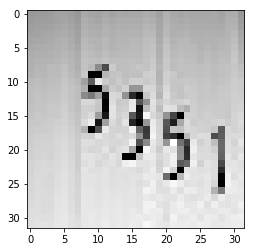

In [68]:
#testing for captured images
captured_data_flt=np.ndarray(shape=(16,32*32))# sixteen images are captured
for r in range(16):
    captured_data_flt[r]=reshaped2[r].flatten()
captured_pred = rgr.predict(captured_data_flt)
print(captured_pred[8])
displaySequence2(8)

**Answer:**

The model is not predicting the bounding boxes with even a reasonable accuracy for captured images, maybe because of the reasons given in question 10. An example have been provided in the above code cells.

----
## Optional Step 5: Build an Application or Program for a Model
Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified numbers and even the bounding boxes. You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.

Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).

### Optional Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:


### Your optional code implementation goes here.
### Feel free to use as many code cells as needed.



### Documentation
Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 

_Write your documentation here._

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.